# Show Augmentations of a given image
> Augemntation will be visualized for a given image

In [1]:
#| default_exp rt_detr.aug_viz

In [16]:
#| export
import albumentations as A
import torch
from pathlib import Path
from typing import List, Tuple, Dict, Any
from datasets import load_dataset
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [86]:
from cv_tools.core import *

In [8]:
#| export
aug_dict ={
    'perspective': A.Perspective(p=1),
    'horizontal_flip': A.HorizontalFlip(p=1),
    'random_brightness_contrast': A.RandomBrightnessContrast(p=1),
    'hue_saturation_value': A.HueSaturationValue(p=1),
}

In [9]:
from vision_models.rt_detr.finetuning import *

In [108]:
id2label

{0: 'Coverall', 1: 'Face_Shield', 2: 'Gloves', 3: 'Goggles', 4: 'Mask'}

In [109]:
cats

[4, 4, 0, 0]

In [112]:
#| export
def apply_aug(
    aug_name:str,
    aug_dict:dict,
    img:np.ndarray,
    bbox:List[List[float]],
    id2label:Dict[int, str]=id2label,
    category_ids:List[int]=cats,
    show:bool=False
    ):
    transformed = A.Compose(
        [aug_dict[aug_name]]
        ,
        bbox_params=A.BboxParams(
            format='coco',
            label_fields=[],
            clip=True,
            min_area=25)
            )

    transformed = transformed(image=img, bboxes=bbox)
    trns_img, trns_boxes =  transformed['image'], transformed['bboxes']
    if show:
        
        visualize(
            trns_img, 
            trns_boxes,
            category_id_to_name=id2label, 
            category_ids=category_ids,
            second_image=np.array(img),
            second_boxes=bbox
        )
    return trns_img, trns_boxes



In [27]:
#| export
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

In [106]:
#| export
def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    if isinstance(bbox, list):
        bbox = tuple(bbox)
    x_min, y_min, w, h = bbox
    x_max = x_min + w
    y_max = y_min + h
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)
    #x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    new_img = img.copy()

    cv2.rectangle(new_img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(new_img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        new_img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return new_img


def visualize(
    image:np.ndarray, 
    bboxes:List[Tuple[int, int, int, int]],
    category_ids:List[int], 
    category_id_to_name:Dict[int, str],
    second_image:np.ndarray=None,
    second_boxes:List[Tuple[int, int, int, int]]=None,
    ):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    if (second_image is not None) and (second_boxes is not None):

        for s_bbox, s_category_id in zip(
            second_boxes, category_ids):
            class_name = category_id_to_name[category_id]
            second_image = visualize_bbox(
                second_image, 
                s_bbox, 
                class_name)
        img = concat_images(
            [img, second_image], rows=1, cols=2, number='')



    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [134]:
#| eval:False
dataset = load_dataset("cppe-5")

In [135]:
#| eval:False
img, labels = get_ds_obj(dataset, 'train', 0)
bbox, cats = labels['bbox'], labels['category']

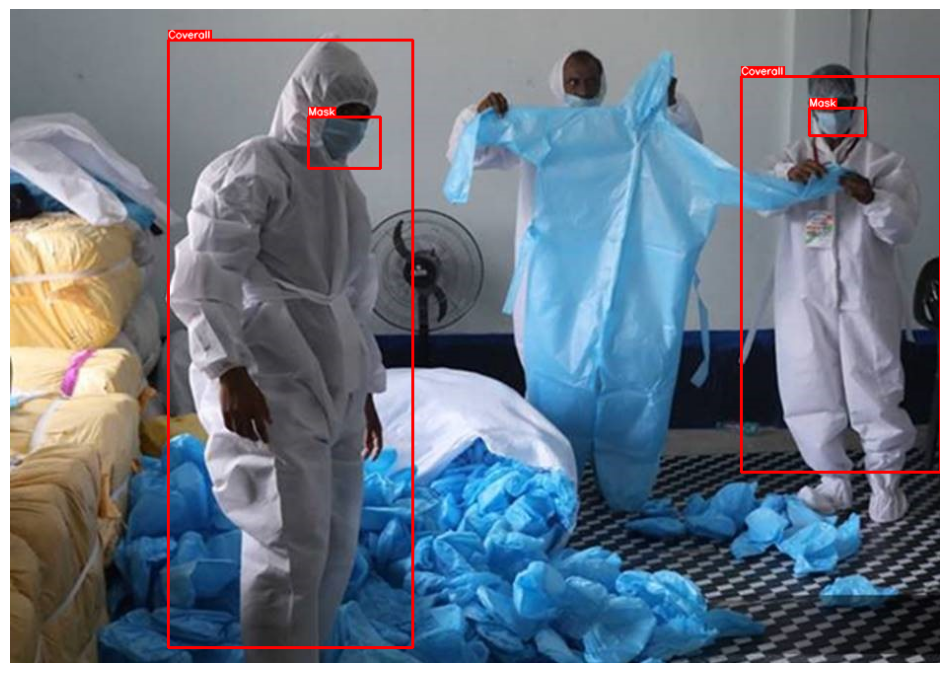

In [136]:
#| eval:False
visualize(np.array(img), bbox,category_id_to_name=id2label, category_ids=cats )

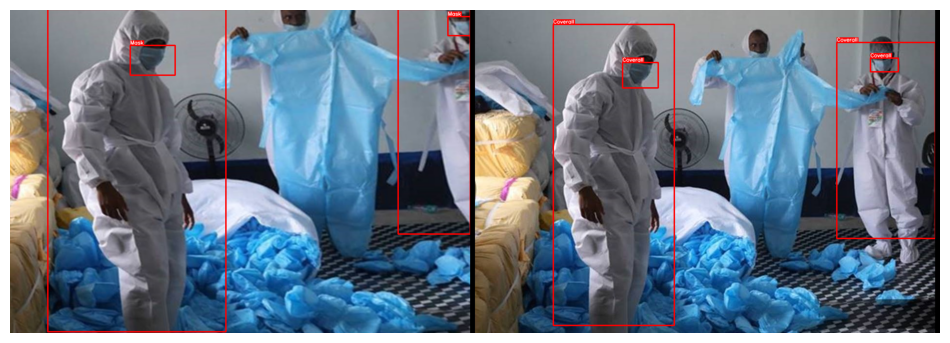

In [137]:
#| eval:False
new_img, new_b = apply_aug(
    'perspective',
    aug_dict,
    np.array(img),
    bbox,
    show=True
)

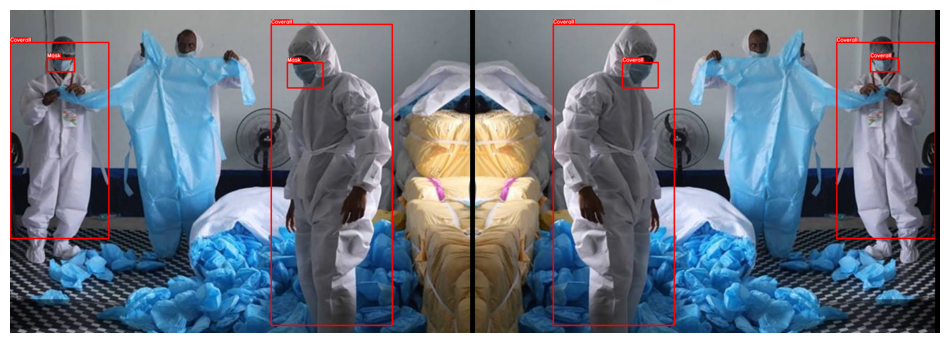

In [138]:
#| eval:False
new_img, new_b = apply_aug(
    'horizontal_flip',
    aug_dict,
    np.array(img),
    bbox,
    show=True
)

/home/user/miniconda3/lib/python3.11/site-packages/albumentations/core/composition.py:147: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


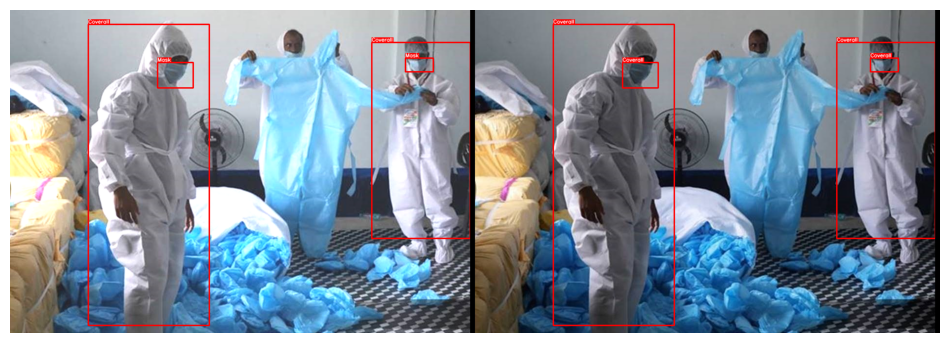

In [139]:
#| eval:False
new_img, new_b = apply_aug(
    'random_brightness_contrast',
    aug_dict,
    np.array(img),
    bbox,
    show=True
)

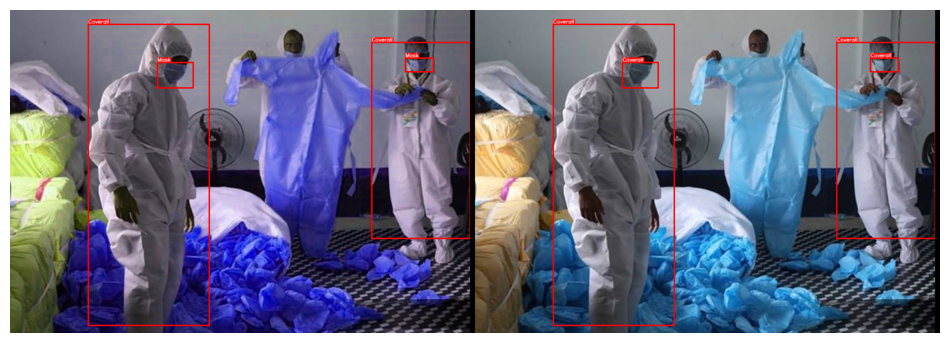

In [141]:
#| eval:False
new_img, new_b = apply_aug(
    'hue_saturation_value',
    aug_dict,
    np.array(img),
    bbox,
    show=True
)

In [142]:
#| hide
import nbdev; nbdev.nbdev_export('03_rt_detr.aug_viz.ipynb')